# Interpretação e análise dos dados

Nessa etapa vamos tentar, por meio de uma análise manual, identificar padrões e anomalias nas distribuições dos dados.

In [45]:
## Importando as dependências necessárias ao longo do projeto.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
# Carregar o dataset
file_path_cleaned = 'data/UCMF_limpo.csv'
data = pd.read_csv(file_path_cleaned)

display(data)

,ID,IMC,IDADE,PULSOS,PPA,NORMAL X ANORMAL,B2,SOPRO,FC,HDA 1,HDA2,SEXO,MOTIVO1,MOTIVO2
0,1,19.0,0.12,Normais,Não Calculado,Anormal,Normal,Sistólico,112,Palpitacao,Palpitacao,Masculino,Grupo 6,Grupo 6
1,2,14.0,0.02,Normais,Não Calculado,Anormal,Normal,Ausente,128,Dispneia,Palpitacao,Masculino,Grupo 6,Grupo 6
2,3,16.0,0.01,Normais,Não Calculado,Anormal,Normal,Sistólico,88,Assintomático,Palpitacao,Masculino,Grupo 2,Grupo 5
3,4,19.0,0.50,Normais,Não Calculado,Anormal,Normal,Ausente,92,Assintomático,Palpitacao,Masculino,Grupo 5,Grupo 5
4,5,20.0,9.60,Normais,Normal,Anormal,Normal,Ausente,90,Assintomático,Palpitacao,Masculino,Grupo 5,Grupo 5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15838,17869,16.0,1.20,Normais,Não Calculado,Normal,Normal,Ausente,92,Assintomático,Palpitacao,Masculino,Grupo 5,Grupo 5
15839,17870,21.0,0.81,Normais,Não Calculado,Normal,Normal,Ausente,90,Assintomático,Palpitacao,Masculino,Grupo 5,Grupo 5
15840,17871,21.0,0.01,Normais,Não Calculado,Normal,Normal,Ausente,76,Dor precordial,Palpitacao,Feminino,Grupo 1,Grupo 1
15841,17872,15.0,0.01,Normais,Não Calculado,Normal,Normal,Sistólico,80,Assintomático,Palpitacao,Feminino,Grupo 6,Grupo 6


### Distribuição de classes e variáveis categóricas.

Nesse tópico buscamos entender visualmente como os dados estão distribuídos em relação às categorias presentes. Primeiro, analisamos a distribuição dos dados que indicam a quantidade de pacientes classificados como normais ou anormais, ajudando a identificar possíveis desbalanceamentos no dataset. Em seguida, exploramos as variáveis categóricas, como pulsos, pressão arterial, sexo e motivos de encaminhamento, para observar quais categorias são mais frequentes e identificar padrões que possam estar associados à presença ou ausência de patologias cardíacas. Essas análises iniciais fornecem uma visão geral importante para orientar as próximas etapas do estudo.

##### Visualizando a distribuição de idade dos pacientes.

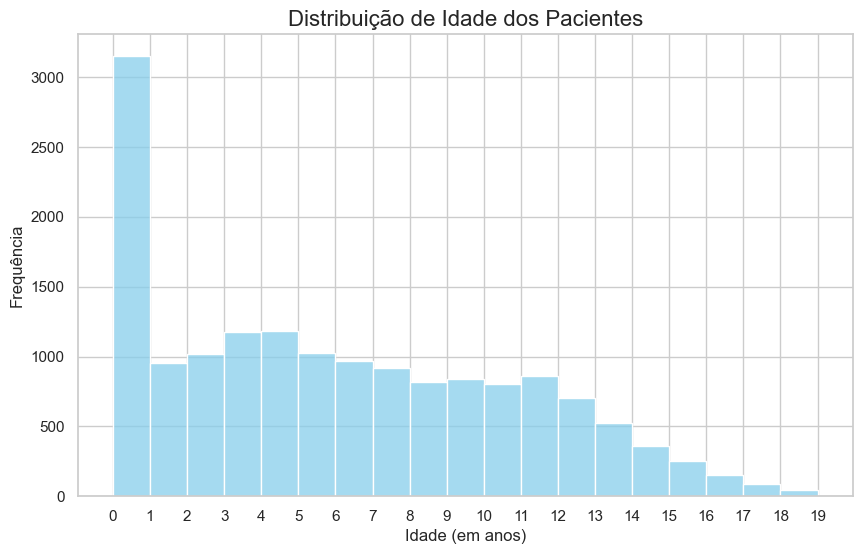

In [47]:
# Configuração do gráfico
sns.set(style="whitegrid")

# Criando o histograma com intervalos de 1 ano
plt.figure(figsize=(10, 6))
sns.histplot(data['IDADE'], bins=range(0, 20, 1), kde=False, color='skyblue')
plt.title('Distribuição de Idade dos Pacientes', fontsize=16)
plt.xlabel('Idade (em anos)', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.xticks(range(0, 20, 1))  # Configura os rótulos do eixo x
plt.show()

- Pelo gráfico, fica evidente que a maior concentração de amostras está concetrada no intervalo dos primeiro ano de idade.
- Também podemos identificar que, a partir do segundo ano, há uma queda drastica na quantidade de amostras e existe uma tendencia de redução nessa quantidade para as faixas etárias seguintes.

---

##### Visualizando a distribuição de idade dos pacientes.

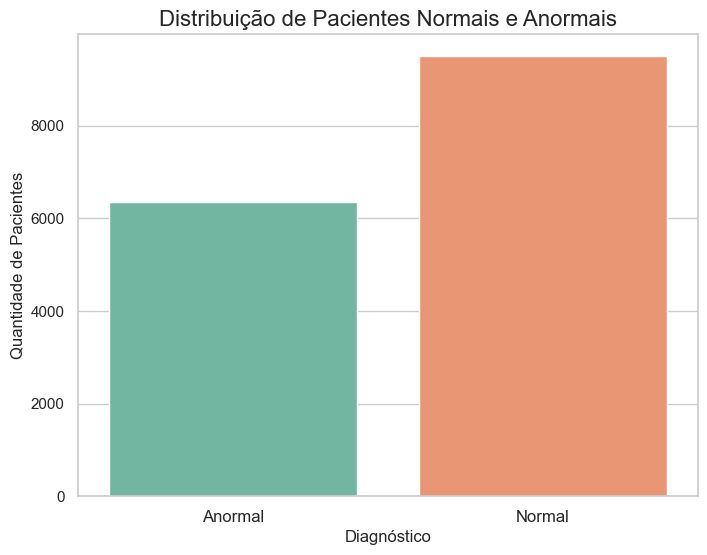

In [48]:
# Configuração do gráfico
sns.set(style="whitegrid")

# Criando o gráfico de barras para distribuição de normais e anormais
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='NORMAL X ANORMAL', hue='NORMAL X ANORMAL', dodge=False, palette='Set2')
plt.title('Distribuição de Pacientes Normais e Anormais', fontsize=16)
plt.xlabel('Diagnóstico', fontsize=12)
plt.ylabel('Quantidade de Pacientes', fontsize=12)
plt.xticks(fontsize=12)
plt.legend([], [], frameon=False)  # Remove a legenda redundante
plt.show()

- Pela descrição do DataSet, Normal e Anormal representa ausencia ou presença de patologia.
- Podemos identificar que, é predominante a ausencia de patologia no DataSet.
- Apesar disso, a concentração de presença de patologia é elevada.

---

##### Visualizando a distribuição de sexo dos pacientes.

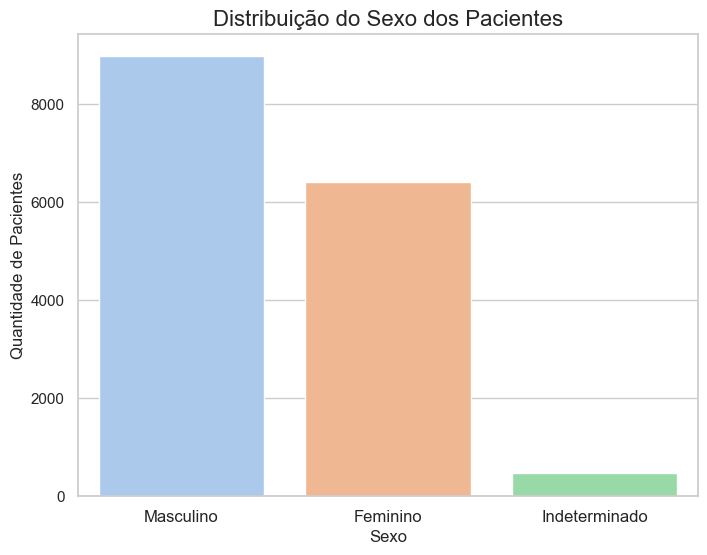

In [49]:
# Configuração do gráfico
sns.set(style="whitegrid")

# Criando o gráfico de barras para a distribuição de sexo
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='SEXO', hue= 'SEXO', palette='pastel')
plt.title('Distribuição do Sexo dos Pacientes', fontsize=16)
plt.xlabel('Sexo', fontsize=12)
plt.ylabel('Quantidade de Pacientes', fontsize=12)
plt.xticks(fontsize=12)
plt.show()

- Podemos identificar que ocorrencias do sexo masculino é dominante.
- Necessário levar em consideração a ocorrência do sexo indeterminado.

---

##### Visualizando a distribuição dos Tipos de Pulsos dos Pacientes.

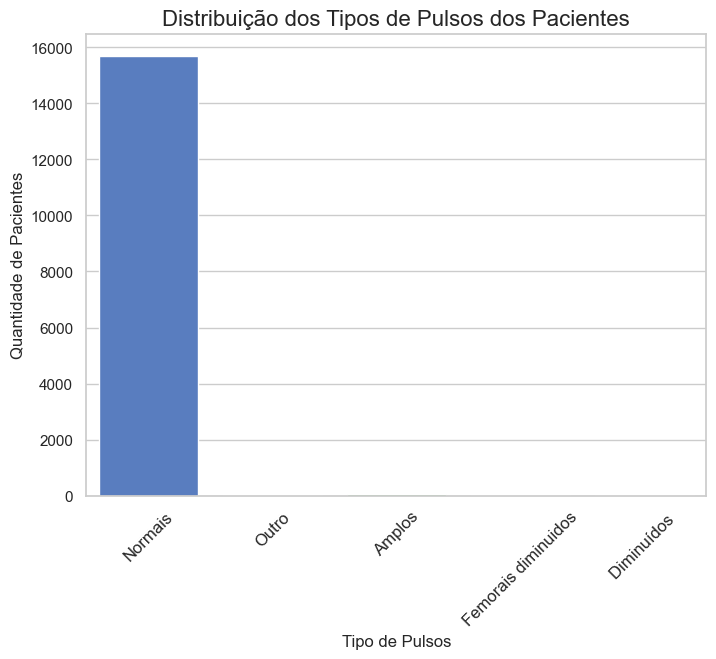

In [50]:
# Configuração do gráfico
sns.set(style="whitegrid")

# Criando o gráfico de barras para a distribuição de pulsos
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='PULSOS', hue='PULSOS', palette='muted')
plt.title('Distribuição dos Tipos de Pulsos dos Pacientes', fontsize=16)
plt.xlabel('Tipo de Pulsos', fontsize=12)
plt.ylabel('Quantidade de Pacientes', fontsize=12)
plt.xticks(fontsize=12, rotation=45)  # Rotação para melhorar a visualização
plt.show()

- A distribuição demonstra que pulsos normais são completamente dominantes na distribuição.

---

##### Visualizando a distribuição de PPA (PAS/PAD) dos Pacientes

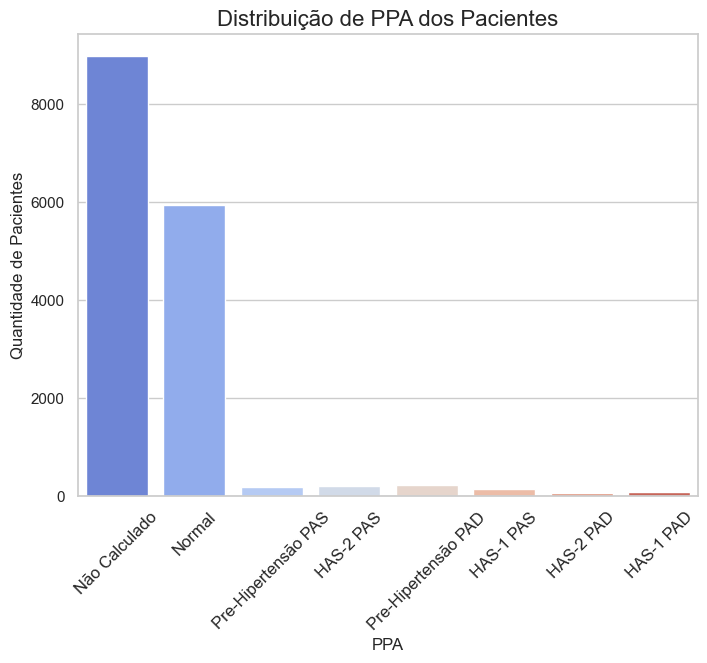

In [51]:
# Configuração do gráfico
sns.set(style="whitegrid")

# Criando o gráfico de barras para a distribuição de PPA
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='PPA', hue='PPA', palette='coolwarm')
plt.title('Distribuição de PPA dos Pacientes', fontsize=16)
plt.xlabel('PPA', fontsize=12)
plt.ylabel('Quantidade de Pacientes', fontsize=12)
plt.xticks(fontsize=12, rotation=45)  # Rotação para melhor visualização
plt.show()

- Existe baixa disperção de calculados.

---

##### Visualizando a distribuição de PPA (PAS/PAD) dos Pacientes

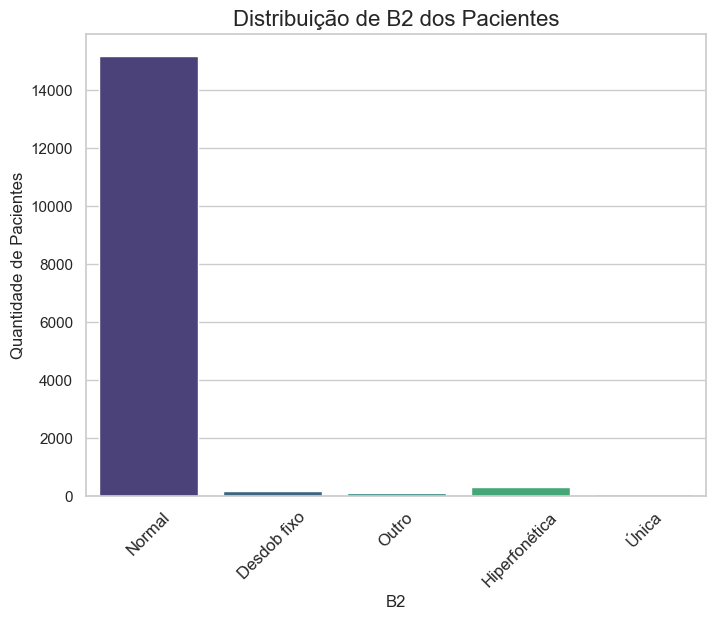

In [52]:
# Configuração do gráfico
sns.set(style="whitegrid")

# Criando o gráfico de barras para a distribuição de B2
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='B2', hue= 'B2', palette='viridis')
plt.title('Distribuição de B2 dos Pacientes', fontsize=16)
plt.xlabel('B2', fontsize=12)
plt.ylabel('Quantidade de Pacientes', fontsize=12)
plt.xticks(fontsize=12, rotation=45)  # Rotação para melhorar a visualização
plt.show()

---

##### Visualizando a distribuição dos tipos de Sopros dos Pacientes.

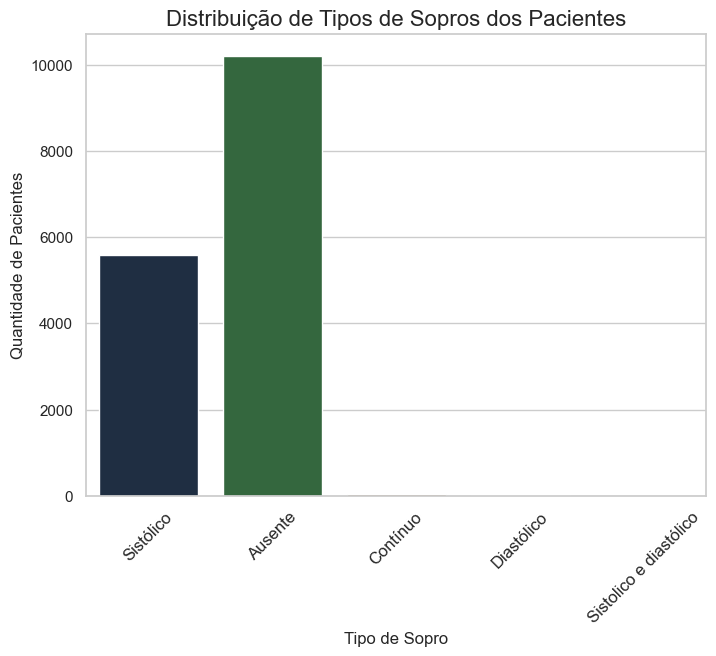

In [53]:
# Configuração do gráfico
sns.set(style="whitegrid")

# Criando o gráfico de barras para a distribuição de SOPRO
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='SOPRO', hue='SOPRO', palette='cubehelix')
plt.title('Distribuição de Tipos de Sopros dos Pacientes', fontsize=16)
plt.xlabel('Tipo de Sopro', fontsize=12)
plt.ylabel('Quantidade de Pacientes', fontsize=12)
plt.xticks(fontsize=12, rotation=45)  # Rotação para melhorar a visualização
plt.show()


- Sistólico é o único tipo de sopro dominante.

---

##### Visualizando a distribuição de Motivo 1.

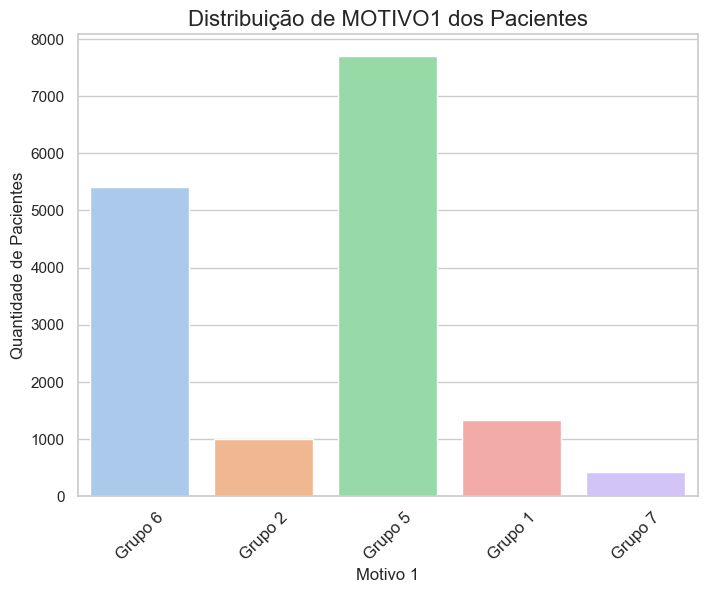

In [54]:
# Configuração do gráfico
sns.set(style="whitegrid")

# Criando o gráfico de barras para a distribuição de MOTIVO1
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='MOTIVO1', hue='MOTIVO1', palette='pastel')
plt.title('Distribuição de MOTIVO1 dos Pacientes', fontsize=16)
plt.xlabel('Motivo 1', fontsize=12)
plt.ylabel('Quantidade de Pacientes', fontsize=12)
plt.xticks(fontsize=12, rotation=45)  # Rotação para melhorar a visualização
plt.show()

---

##### Visualizando a distribuição de Motivo 2.

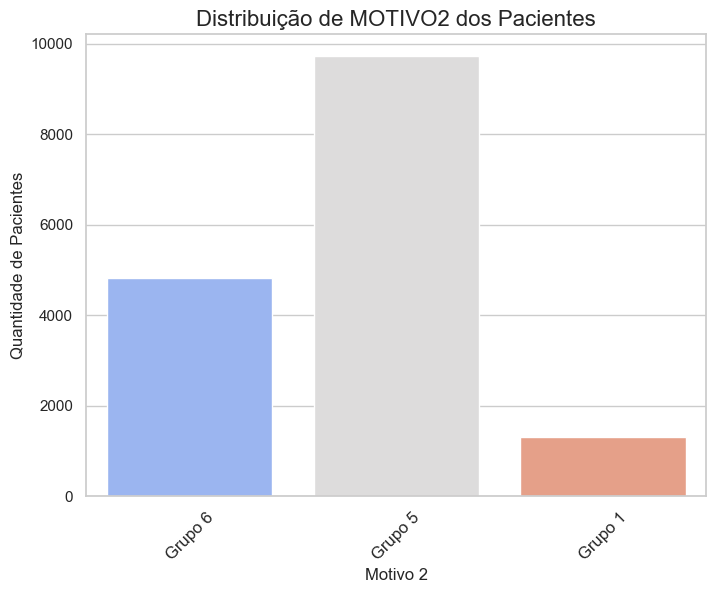

In [55]:
# Configuração do gráfico
sns.set(style="whitegrid")

# Criando o gráfico de barras para a distribuição de MOTIVO2
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='MOTIVO2', hue='MOTIVO2', palette='coolwarm')
plt.title('Distribuição de MOTIVO2 dos Pacientes', fontsize=16)
plt.xlabel('Motivo 2', fontsize=12)
plt.ylabel('Quantidade de Pacientes', fontsize=12)
plt.xticks(fontsize=12, rotation=45)  # Rotação para melhorar a visualização
plt.show()


---

---

#### Conclusão

Com base na visualização dos dados, foi possível identificar a proporção de pacientes classificados como normais e anormais (Com ou sem patologia), destacando eventuais desbalanceamentos que podem impactar análises futuras. Além disso, a distribuição das variáveis categóricas revelou padrões relevantes, como a predominância de certas categorias em grupos específicos, o que pode indicar fatores associados às condições cardíacas. Essas observações iniciais ajudam a construir hipóteses sobre os principais fatores de risco e orientam as próximas etapas de exploração e modelagem preditiva.

---

### Comparações entre normais e anormais em variáveis numéricas como IMC e idade.

Nesse tópico, comparamos as variáveis numéricas, como IMC e idade, entre os pacientes classificados como normais e anormais. O objetivo é identificar diferenças significativas entre esses dois grupos, o que pode fornecer insights sobre fatores que influenciam a presença de patologias cardíacas. Utilizamos gráficos e estatísticas descritivas para visualizar as distribuições e observar padrões relevantes.

---

##### Distribuição de IMC entre Normais e Anormais (Com e sem patologia)

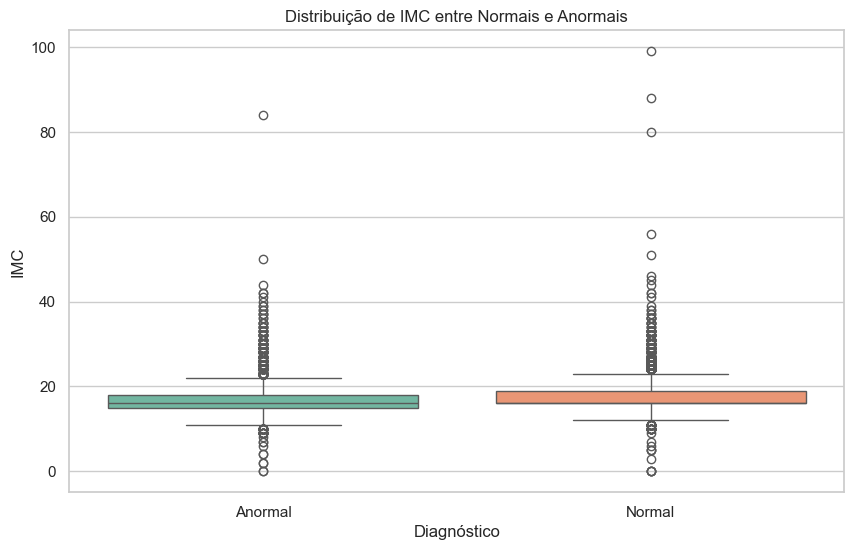

In [56]:
# Configuração dos gráficos
sns.set(style="whitegrid")

# Comparação de IMC entre normais e anormais
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='NORMAL X ANORMAL', hue='NORMAL X ANORMAL', y='IMC', palette='Set2')
plt.title('Distribuição de IMC entre Normais e Anormais')
plt.xlabel('Diagnóstico')
plt.ylabel('IMC')
plt.show()

---

##### Distribuição de Idade entre Normais e Anormais

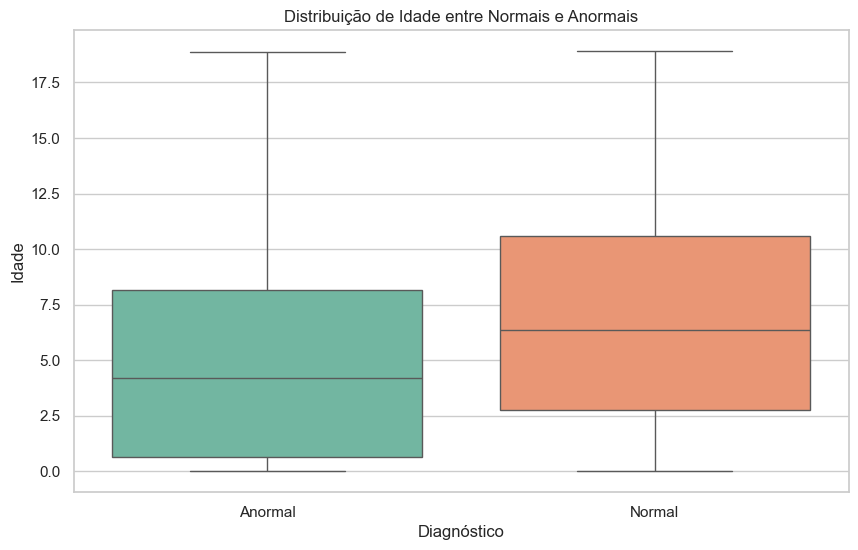

In [57]:
# Comparação de idade entre normais e anormais
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='NORMAL X ANORMAL', hue='NORMAL X ANORMAL', y='IDADE', palette='Set2')
plt.title('Distribuição de Idade entre Normais e Anormais')
plt.xlabel('Diagnóstico')
plt.ylabel('Idade')
plt.show()

---

##### Estatísticas descritivas por classe em relação ao IMC e a Idade.

In [58]:
# Estatísticas descritivas para IMC e idade por classe
imc_stats = data.groupby('NORMAL X ANORMAL')['IMC'].describe()
idade_stats = data.groupby('NORMAL X ANORMAL')['IDADE'].describe()

print("Estatísticas descritivas de IMC por classe:")
display(imc_stats.style.background_gradient(cmap='coolwarm').format(precision=2))

print("\nEstatísticas descritivas de Idade por classe:")
display(idade_stats.style.background_gradient(cmap='viridis').format(precision=2))


Estatísticas descritivas de IMC por classe:


,count,mean,std,min,25%,50%,75%,max
NORMAL X ANORMAL,,,,,,,,
Anormal,6346.00,16.91,3.42,0.07,15.00,16.00,18.00,84.00
Normal,9497.00,17.71,3.70,0.02,16.00,16.00,19.00,99.00



Estatísticas descritivas de Idade por classe:


,count,mean,std,min,25%,50%,75%,max
NORMAL X ANORMAL,,,,,,,,
Anormal,6346.00,5.01,4.51,0.00,0.63,4.19,8.15,18.86
Normal,9497.00,6.76,4.69,0.00,2.76,6.35,10.58,18.91


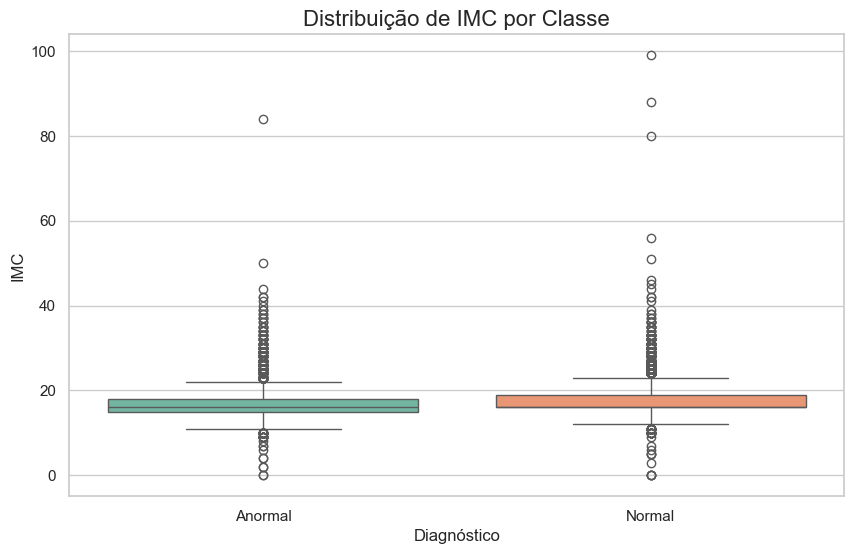

In [59]:
# Visualização com boxplots para IMC
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='NORMAL X ANORMAL', hue='NORMAL X ANORMAL', y='IMC', palette='Set2')
plt.title('Distribuição de IMC por Classe', fontsize=16)
plt.xlabel('Diagnóstico', fontsize=12)
plt.ylabel('IMC', fontsize=12)
plt.show()

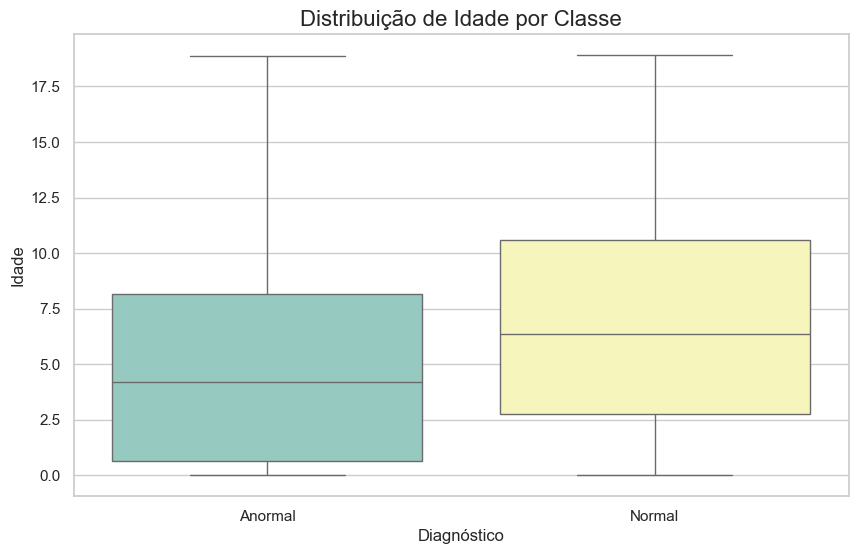

In [60]:
# Visualização com boxplots para Idade
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='NORMAL X ANORMAL', hue='NORMAL X ANORMAL', y='IDADE', palette='Set3')
plt.title('Distribuição de Idade por Classe', fontsize=16)
plt.xlabel('Diagnóstico', fontsize=12)
plt.ylabel('Idade', fontsize=12)
plt.show()

---

#### Conclusão

As análises revelaram diferenças importantes entre os grupos normais e anormais nas variáveis IMC e idade:

- Para o IMC, foi possível observar que pacientes com diagnóstico anormal (com patologia) tendem a apresentar maior variabilidade e valores médios superiores em relação aos pacientes normais, indicando que um IMC elevado pode ser um fator associado a patologias cardíacas.

- Quanto à idade, pacientes anormais (com patologia) também apresentaram uma média maior, sugerindo que a probabilidade de diagnóstico anormal (com patologia) aumenta com a idade.

Esses padrões destacam a importância dessas variáveis como potenciais indicadores de risco e reforçam a necessidade de explorá-las em modelos preditivos nas etapas seguintes.

---

### Relações entre sopro, B2, e os resultados (NORMAL X ANORMAL).

Neste tópico, exploramos as relações entre os tipos de sopro e as características do som cardíaco (B2) com os resultados da variável alvo (NORMAL X ANORMAL). O objetivo é identificar se há associações relevantes entre essas variáveis clínicas e a presença ou ausência de patologias cardíacas. Essa análise ajuda a compreender como características específicas do exame físico estão relacionadas aos diagnósticos.

---

##### Relação entre Sopro e Diagnóstico.

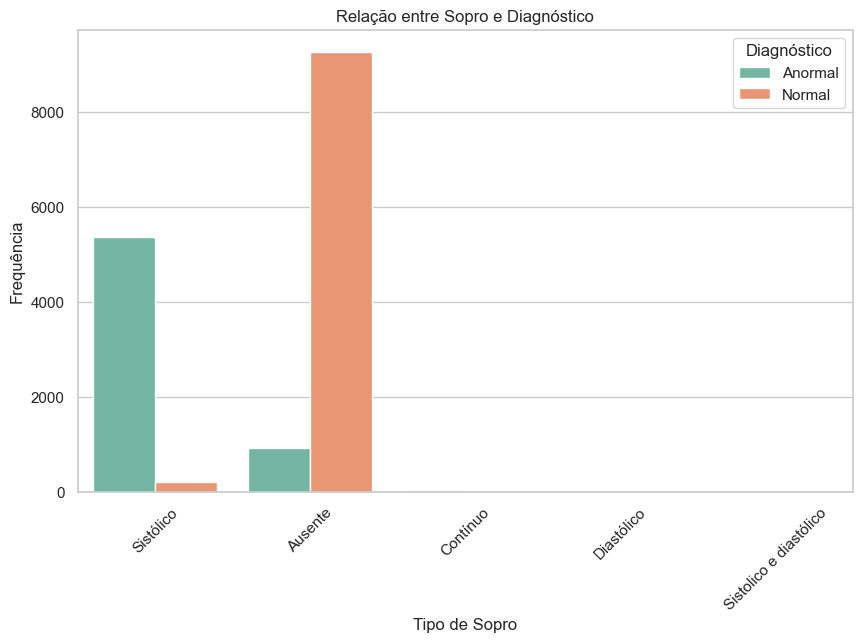

In [61]:
# Configuração dos gráficos
sns.set(style="whitegrid")

# Relação entre Sopro e Diagnóstico
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='SOPRO', hue='NORMAL X ANORMAL', palette='Set2')
plt.title('Relação entre Sopro e Diagnóstico')
plt.xlabel('Tipo de Sopro')
plt.ylabel('Frequência')
plt.legend(title='Diagnóstico')
plt.xticks(rotation=45)
plt.show()

---

##### Relação entre B2 e Diagnóstico.

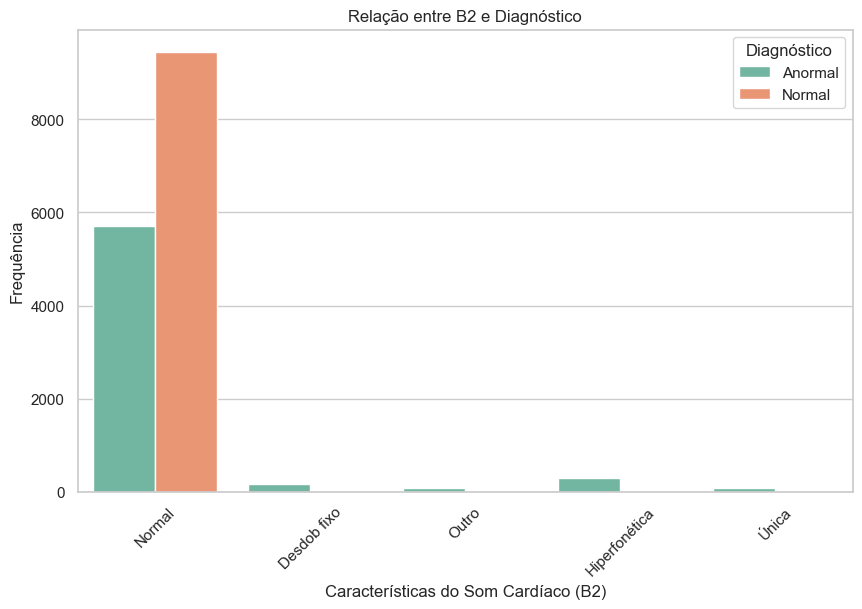

In [62]:
# Relação entre B2 e Diagnóstico
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='B2', hue='NORMAL X ANORMAL', palette='Set2')
plt.title('Relação entre B2 e Diagnóstico')
plt.xlabel('Características do Som Cardíaco (B2)')
plt.ylabel('Frequência')
plt.legend(title='Diagnóstico')
plt.xticks(rotation=45)
plt.show()

---

##### Distribuição Percentual do Diagnóstico por Tipo de Sopro e por Característica de B2.

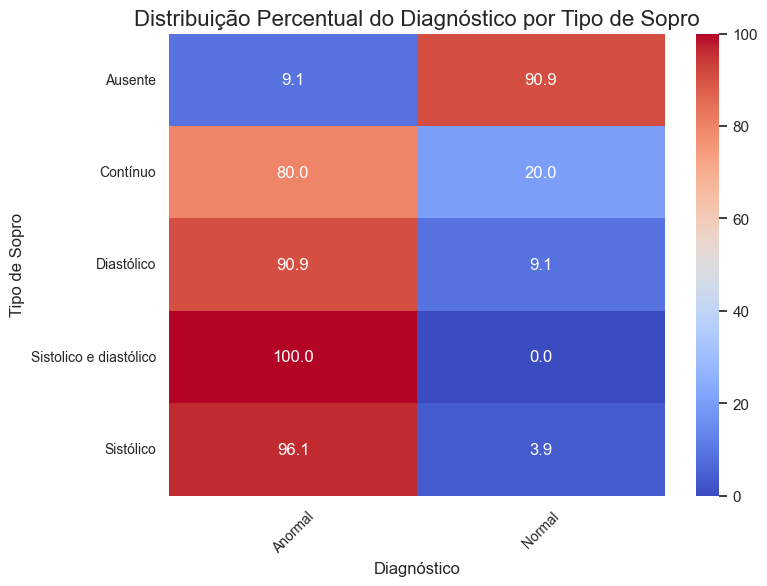

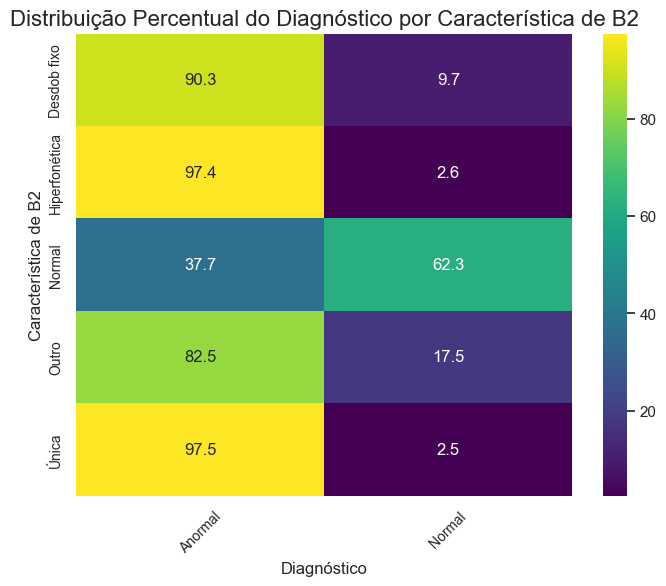

In [63]:
# Tabelas de frequências cruzadas
sopro_crosstab = pd.crosstab(data['SOPRO'], data['NORMAL X ANORMAL'], normalize='index') * 100
b2_crosstab = pd.crosstab(data['B2'], data['NORMAL X ANORMAL'], normalize='index') * 100

# Heatmap para distribuição por tipo de Sopro
plt.figure(figsize=(8, 6))
sns.heatmap(sopro_crosstab, annot=True, fmt=".1f", cmap="coolwarm", cbar=True)
plt.title('Distribuição Percentual do Diagnóstico por Tipo de Sopro', fontsize=16)
plt.xlabel('Diagnóstico', fontsize=12)
plt.ylabel('Tipo de Sopro', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.show()

# Heatmap para distribuição por característica de B2
plt.figure(figsize=(8, 6))
sns.heatmap(b2_crosstab, annot=True, fmt=".1f", cmap="viridis", cbar=True)
plt.title('Distribuição Percentual do Diagnóstico por Característica de B2', fontsize=16)
plt.xlabel('Diagnóstico', fontsize=12)
plt.ylabel('Característica de B2', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.show()

---

#### Conclusão

As análises indicaram relações entre o tipo de sopro, as características de B2, e os resultados do diagnóstico:

- Os pacientes com diagnóstico anormal apresentaram maior prevalência de sopros do tipo sistólico, enquanto os pacientes normais tiveram maior frequência de sopros classificados como ausente.
- Para o som cardíaco B2, padrões anormais foram mais comuns em pacientes diagnosticados com patologias cardíacas, reforçando que características alteradas no exame físico podem estar associadas ao diagnóstico.

Esses resultados mostram a relevância de sopros e características de B2 como potenciais marcadores clínicos e sua possível utilidade para modelos preditivos ou triagem inicial.

---

### Matriz de correlação

Visalização geral das relações entre as variáveis presentes no DataSet.

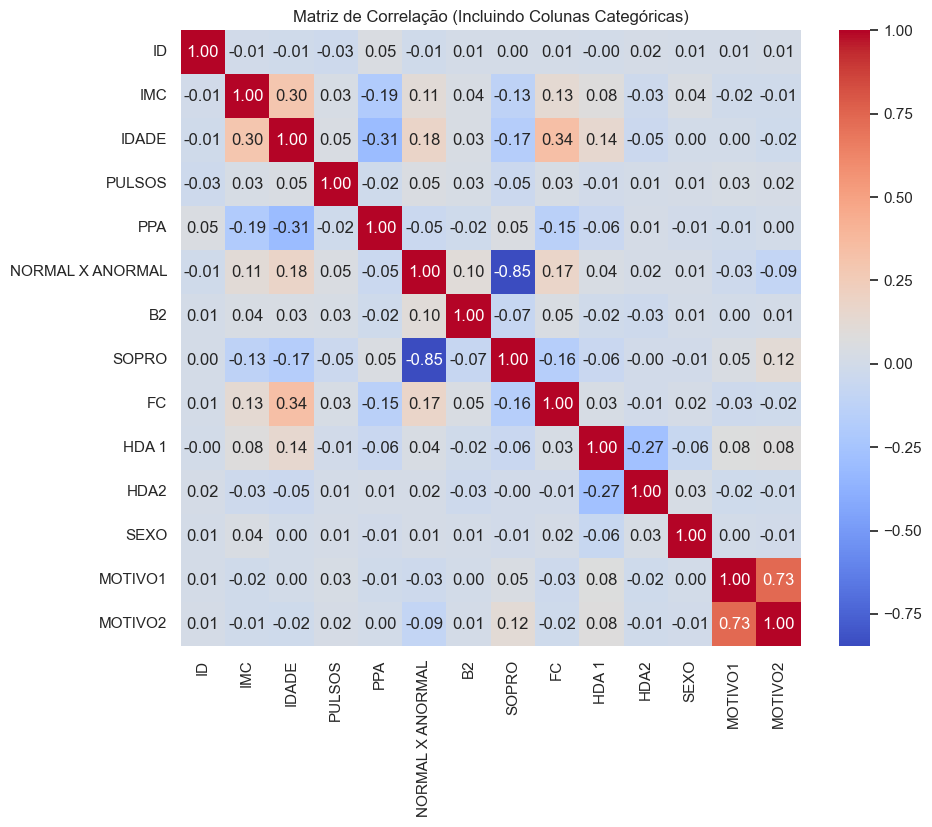

In [64]:
# Identificar colunas não numéricas
non_numeric_columns = data.select_dtypes(include=['object', 'category']).columns

# Transformar colunas não numéricas em numéricas usando codificação ordinal
from sklearn.preprocessing import OrdinalEncoder

# Criar um encoder para transformar valores categóricos em numéricos
ordinal_encoder = OrdinalEncoder()
data[non_numeric_columns] = ordinal_encoder.fit_transform(data[non_numeric_columns])

# Calcular a matriz de correlação com todas as colunas
correlation_matrix = data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Matriz de Correlação (Incluindo Colunas Categóricas)')
plt.show()